In [7]:
# IMPORT NECESSARY PACKAGES
import numpy as np
import os
import matplotlib.pyplot as plt

# PAARTI
from paarti.utils import maos_utils
from scipy.interpolate import griddata

In [54]:
act_study = "../studies/act_count/8mag_lgs"
act_study7 = "../studies/act_count/7mag_lgs"

In [61]:
actuator_count = np.arange(1000, 5776, 250)
actual_lgs_count = np.arange(1, 11)
lgs_count = np.arange(8, 9) # Currently

seed = 1

strehl_ratios = np.zeros((9, len(lgs_count), len(actuator_count)))

In [50]:
for i, act_count in enumerate(actuator_count):
    for j, l_count in enumerate(lgs_count):
        directory_path = os.path.join(act_study, f"{act_count}_actuators/")
    
        if act_count % 1000 == 0:
            print("Entering directory: ", directory_path)


        metrics_kola = maos_utils.get_psf_metrics_over_field(directory=directory_path, seed=seed)
        _, _, _, strehl_kola, *_ = metrics_kola
        strehl_ratios[:, j, i] = strehl_kola[0, :]
        

lgs_value = 8  # You can adjust this to the specific LGS value
extent_y = [lgs_value - 0.5, lgs_value + 0.5] 
print(strehl_kola.shape)

Entering directory:  ../studies/act_count/8mag_lgs/1000_actuators/
Entering directory:  ../studies/act_count/8mag_lgs/2000_actuators/
Entering directory:  ../studies/act_count/8mag_lgs/3000_actuators/
Entering directory:  ../studies/act_count/8mag_lgs/4000_actuators/
Entering directory:  ../studies/act_count/8mag_lgs/5000_actuators/
(1, 9)


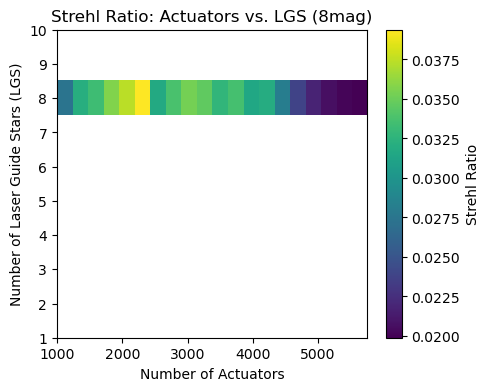

In [53]:
plt.figure(figsize=(5, 4))
plt.imshow(strehl_ratios[0, :, :], extent=[actuator_count.min(), actuator_count.max(), extent_y[0], extent_y[1]], 
           origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label="Strehl Ratio")
plt.xlabel("Number of Actuators")
plt.ylabel("Number of Laser Guide Stars (LGS)")
plt.title("Strehl Ratio: Actuators vs. LGS (8mag)")
plt.ylim(1, 10)
plt.show()

In [55]:
for i, act_count in enumerate(actuator_count):
    for j, l_count in enumerate(lgs_count):
        directory_path = os.path.join(act_study7, f"{act_count}_actuators/")
    
        if act_count % 1000 == 0:
            print("Entering directory: ", directory_path)


        metrics_kola = maos_utils.get_psf_metrics_over_field(directory=directory_path, seed=seed)
        _, _, _, strehl_kola, *_ = metrics_kola
        for k, wvl in enumerate(strehl_kola):
            strehl_ratios[k, j, i] = strehl_kola[:, k]
        

lgs_value = 8  # You can adjust this to the specific LGS value
extent_y = [lgs_value - 0.5, lgs_value + 0.5] 
print(strehl_kola.shape)

Entering directory:  ../studies/act_count/7mag_lgs/1000_actuators/
Entering directory:  ../studies/act_count/7mag_lgs/2000_actuators/
Entering directory:  ../studies/act_count/7mag_lgs/3000_actuators/
Entering directory:  ../studies/act_count/7mag_lgs/4000_actuators/
Entering directory:  ../studies/act_count/7mag_lgs/5000_actuators/
(1, 9)


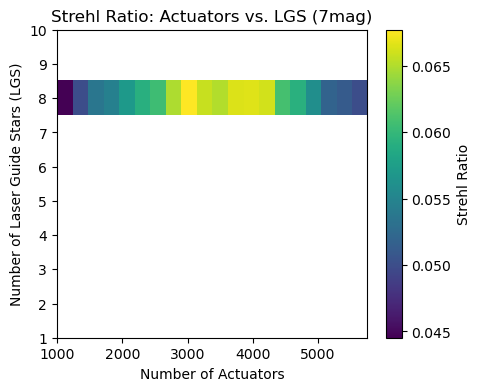

In [60]:
plt.figure(figsize=(5, 4))
plt.imshow(strehl_ratios[0, :, :], extent=[actuator_count.min(), actuator_count.max(), extent_y[0], extent_y[1]], 
           origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label="Strehl Ratio")
plt.xlabel("Number of Actuators")
plt.ylabel("Number of Laser Guide Stars (LGS)")
plt.title("Strehl Ratio: Actuators vs. LGS (7mag)")
plt.ylim(1, 10)
plt.show()